<a href="https://colab.research.google.com/github/martosfre/python/blob/main/ActividadFinal_MarcoToscano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Presentación

**Asignatura**: Python para la inteligencia artificial

**Actividad**: Actividad Final

**Periodo**: Segunda Convocatoria

**Maestrante**: Marco Antonio Toscano Freire


**Objetivos:**

* Aplicar diferentes técnicas de tratamiento de datos explicadas durante el curso
* Explorar datos y evaluarlos mediante el uso de Pandas
* Aplicar adecuadamente técnicas de visualización
* Desarrollar una capacidad crítica y conocer fuentes de información

### Desarrollo Actividad

#### Definición de Fuentes y Objetivo

**Conjunto de Datos:** El dataset elegido para el trabajo final tiene información relacionada con las transacciones de registro y actualización de información de vehículos nuevos comprados en el periodo de 2020 a 2024 reportados al Servicio de Rentas Internas (SRI) en Ecuador

**Fuente Dataset:**.  https://www.sri.gob.ec/datasets

**Objetivos:**


* Analizar preferencias de consumo del usuaro en cuanto a marcas, colores
* Analizar las compras realizadas en un intervalo de tiempo
* Analizar los esquemas de importación y compras locales




#### Instalación de Paquetes Adicionales
Se debe instalar el paquete de lenguaje para posteriormente poder utilizar la localidad es_ES.UTF8 para el tratamiento de las fechas. Al acabar de instalar se debe reiniciar el runtime.

In [2]:
# Instalar el paquede localización en español

!sudo apt-get update
!sudo apt-get install language-pack-es-base
!sudo locale-gen es_ES.UTF-8

# Reiniciar el Runtime

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,651 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,654 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1

#### Conectarse al repositorio de Git

In [19]:
!git clone https://github.com/martosfre/python.git actividadFinal

fatal: destination path 'actividadFinal' already exists and is not an empty directory.


In [20]:
!git config --global user.name "martosfre"
!git config --global user.email "mtoscano@matoosfe.com"

#### Tratamiento de Datos

Sección relacionado con el tratamiento de los datos, en donde se realizarán los procesos ETL(Extracción, Carga y Limpieza de los datos).



1. **Importar datasets.-** Para la importación de los datasets se utilizará los archivos desde la fuente del SRI

In [17]:
import urllib.request
from pathlib import Path
import os

urlVehiculos2020 = "https://descargas.sri.gob.ec/download/datosAbiertos/SRI_Vehiculos_Nuevos_2020.csv"
urlVehiculos2021 = "https://descargas.sri.gob.ec/download/datosAbiertos/SRI_Vehiculos_Nuevos_2021.csv"
urlVehiculos2022 = "https://descargas.sri.gob.ec/download/datosAbiertos/SRI_Vehiculos_Nuevos_2022.csv"
urlVehiculos2023 = "https://descargas.sri.gob.ec/download/datosAbiertos/SRI_Vehiculos_Nuevos_2023.csv"
urlVehiculos2024 = "https://descargas.sri.gob.ec/download/datosAbiertos/SRI_Vehiculos_Nuevos_2024.csv"

urlVehiculos = [[urlVehiculos2020, "vehiculos2020.csv"],
                [urlVehiculos2021, "vehiculos2021.csv"],
                [urlVehiculos2022, "vehiculos2022.csv"],
                [urlVehiculos2023, "vehiculos2023.csv"],
                [urlVehiculos2024, "vehiculos2024.csv"]]

directorio = Path("actividadFinal/dataset_vehiculos")

#Crea un directorio si no existe
directorio.mkdir(parents=True, exist_ok=True)

#Crear los archivos a través de la url
vehiculos = []
for url, nombre in urlVehiculos:
    vehiculo = os.path.join(directorio, nombre)
    if not os.path.exists(vehiculo):
      urllib.request.urlretrieve(url, vehiculo)
    else:
      if os.path.getsize(vehiculo) == 0:
        urllib.request.urlretrieve(url, vehiculo)
    vehiculos.append(vehiculo)



2. **Cargar datasets.-** Proceder a cargar los datasets recuperados y verificar que la estructura de cada uno de ellos antes de continuar con el procesamiento.

In [3]:
import pandas as pd

datasetVehiculos2020 = pd.read_csv(vehiculos[0], sep=';', encoding='iso-8859-1', header=None, index_col=False,
                                   names=['Categoria', 'CodigoVehiculo', 'TipoTransaccion', 'Marca',
                                          'Modelo','Pais', 'AnioModelo', 'Clase', 'SubClase', 'Tipo',
                                          'Avaluo', 'FechaProceso', 'TipoServicio', 'Cilindraje',
                                          'TipoCombustible', 'FechaCompra', 'Canton',  'ColorUno',
                                          'ColorDos', 'TipoPersona'], engine='python', skiprows=1)
display(datasetVehiculos2020.head())

datasetVehiculos2021 = pd.read_csv(vehiculos[1], sep=';', encoding='iso-8859-1', header=None, index_col=False,
                                   names=['Categoria', 'CodigoVehiculo', 'TipoTransaccion', 'Marca',
                                          'Modelo','Pais', 'AnioModelo', 'Clase', 'SubClase', 'Tipo',
                                          'Avaluo', 'FechaProceso', 'TipoServicio', 'Cilindraje',
                                          'TipoCombustible', 'FechaCompra', 'Canton',  'ColorUno',
                                          'ColorDos', 'TipoPersona'], engine='python', skiprows=1)
display(datasetVehiculos2021.head())

datasetVehiculos2022 = pd.read_csv(vehiculos[2], sep=';', encoding='iso-8859-1', header=None, index_col=False,
                                   names=['Categoria', 'CodigoVehiculo', 'TipoTransaccion', 'Marca',
                                          'Modelo','Pais', 'AnioModelo', 'Clase', 'SubClase', 'Tipo',
                                          'Avaluo', 'FechaProceso', 'TipoServicio', 'Cilindraje',
                                          'TipoCombustible', 'FechaCompra', 'Canton',  'ColorUno',
                                          'ColorDos', 'TipoPersona'], engine='python',  skiprows=1)
display(datasetVehiculos2022.head())

datasetVehiculos2023 = pd.read_csv(vehiculos[3], sep=';', encoding='iso-8859-1', header=None, index_col=False,
                                   names=['Categoria', 'CodigoVehiculo', 'TipoTransaccion', 'Marca',
                                          'Modelo','Pais', 'AnioModelo', 'Clase', 'SubClase', 'Tipo',
                                          'Avaluo', 'FechaProceso', 'TipoServicio', 'Cilindraje',
                                          'TipoCombustible', 'FechaCompra', 'Canton',  'ColorUno',
                                          'ColorDos', 'TipoPersona'], engine='python', skiprows=1)
display(datasetVehiculos2023.head())

datasetVehiculos2024 = pd.read_csv(vehiculos[4], sep=';', encoding='iso-8859-1', header=None, index_col=False,
                                   names=['Categoria', 'CodigoVehiculo', 'TipoTransaccion', 'Marca',
                                          'Modelo','Pais', 'AnioModelo', 'Clase', 'SubClase', 'Tipo',
                                          'Avaluo', 'FechaProceso', 'TipoServicio', 'Cilindraje',
                                          'TipoCombustible', 'FechaCompra', 'Canton',  'ColorUno',
                                          'ColorDos', 'TipoPersona'], engine='python',skiprows=1)
display(datasetVehiculos2024.head())



,Categoria,CodigoVehiculo,TipoTransaccion,Marca,Modelo,Pais,AnioModelo,Clase,SubClase,Tipo,Avaluo,FechaProceso,TipoServicio,Cilindraje,TipoCombustible,FechaCompra,Canton,ColorUno,ColorDos,TipoPersona
0,349730,7224326,COMPRA LOCAL,MERCEDES BENZ,OF 1723 6.4 2P 4X2 TM DIESEL,BRASIL,2020,OMNIBUS,BUS,PESADO,154900,27-Nov-20,ALQ,6374,DIESEL,29-Ago-20,10901,NEG,NaN,NaN
1,349643,7371119,COMPRA LOCAL,SINOTRUK,SITRAK C7H ZZ1256V524ME1 AC 10.5 2P 6X4 TM DIESEL,CHINA POPULAR,2021,CAMION,CAJON-C,PESADO,100990,28-Oct-20,ALQ,10518,DIESEL,28-Oct-20,21807,BLA,BLA,NaN
2,349643,7371122,COMPRA LOCAL,SINOTRUK,SITRAK C7H ZZ1256V524ME1 AC 10.5 2P 6X4 TM DIESEL,CHINA POPULAR,2021,CAMION,CAJON-C,PESADO,100990,4-Nov-20,ALQ,10518,DIESEL,30-Oct-20,21807,BLA,BLA,NaN
3,349641,7454478,COMPRA LOCAL,AUDI,Q3 SPORTBACK FULL TFSI F3NA6Y AC 2.0 5P 4X4 TA,ALEMANIA,2021,JEEP,JEEP,LIVIANO,66000,22-Dic-20,PAR,2000,GASOLINA,21-Dic-20,21701,BLA,NaN,NaN
4,349638,7384736,COMPRA LOCAL,HYUNDAI,HD45 AC 2.6 2P 4X2 TM DIESEL,ECUADOR,2021,CAMION,FURGON-C,PESADO,26110,26-Nov-20,ALQ,2607,DIESEL,26-Nov-20,22301,BLA,VRD,NaN


,Categoria,CodigoVehiculo,TipoTransaccion,Marca,Modelo,Pais,AnioModelo,Clase,SubClase,Tipo,Avaluo,FechaProceso,TipoServicio,Cilindraje,TipoCombustible,FechaCompra,Canton,ColorUno,ColorDos,TipoPersona
0,488726,6926730,COMPRA LOCAL,MERCEDES BENZ,OF 1723 6.4 2P 4X2 TM DIESEL,BRASIL,2019,OMNIBUS,BUS,PESADO,70737,2-dic-21,PAR,6374,DIESEL,29-oct-21,10901,NEG,NaN,NATURAL
1,487526,7927017,COMPRA LOCAL,MACK,GR64BX AC 12.8 2P 6X4 TM DIESEL,ESTADOS UNIDOS,2022,VOLQUETA,VOLQUETA,PESADO,164000,16-dic-21,PAR,12800,DIESEL,15-dic-21,10927,BLA,BLA,SOCIEDAD
2,487526,7927016,COMPRA LOCAL,MACK,GR64BX AC 12.8 2P 6X4 TM DIESEL,ESTADOS UNIDOS,2022,VOLQUETA,VOLQUETA,PESADO,164000,16-dic-21,PAR,12800,DIESEL,15-dic-21,10927,BLA,BLA,SOCIEDAD
3,487526,7927017,COMPRA LOCAL,MACK,GR64BX AC 12.8 2P 6X4 TM DIESEL,ESTADOS UNIDOS,2022,VOLQUETA,VOLQUETA,PESADO,164000,17-dic-21,PAR,12800,DIESEL,15-dic-21,10927,BLA,BLA,SOCIEDAD
4,487526,7927016,COMPRA LOCAL,MACK,GR64BX AC 12.8 2P 6X4 TM DIESEL,ESTADOS UNIDOS,2022,VOLQUETA,VOLQUETA,PESADO,164000,17-dic-21,PAR,12800,DIESEL,15-dic-21,10927,BLA,BLA,SOCIEDAD


,Categoria,CodigoVehiculo,TipoTransaccion,Marca,Modelo,Pais,AnioModelo,Clase,SubClase,Tipo,Avaluo,FechaProceso,TipoServicio,Cilindraje,TipoCombustible,FechaCompra,Canton,ColorUno,ColorDos,TipoPersona
0,646088,8546301,IMPORTACIÓN DIRECTA,JEEP,COMPASS AC 2.4 5P 4X4 TM,MEXICO,2020,JEEP,JEEP,LIVIANO,"17795,42",28-dic-22,PAR,2400,GASOLINA,21-dic-22,20502,NEG,NEG,NATURAL
1,645791,8388387,COMPRA LOCAL,MERCEDES BENZ,SPRINTER 315 CDI STANDARD TECHO ELEVADO AMBULA...,ALEMANIA,2023,ESPECIAL,AMBULANCIA,LIVIANO,"146399,36",14-dic-22,PAR,2143,DIESEL,14-dic-22,22301,BLA,BLA,JURÍDICA
2,645789,8282241,COMPRA LOCAL,HINO,RM1ESSU-XSE 13.0 2P 4X2 TM DIESEL,COLOMBIA,2023,OMNIBUS,BUS,PESADO,201990,28-jul-22,ALQ,12913,DIESEL,5-oct-22,20101,PLA,NEG,JURÍDICA
3,645789,8282241,COMPRA LOCAL,HINO,RM1ESSU-XSE 13.0 2P 4X2 TM DIESEL,COLOMBIA,2023,OMNIBUS,BUS,PESADO,201990,6-oct-22,ALQ,12913,DIESEL,5-oct-22,20101,PLA,NEG,JURÍDICA
4,645789,8282241,COMPRA LOCAL,HINO,RM1ESSU-XSE 13.0 2P 4X2 TM DIESEL,COLOMBIA,2023,OMNIBUS,BUS,PESADO,201990,12-oct-22,ALQ,12913,DIESEL,5-oct-22,20101,PLA,NEG,JURÍDICA


,Categoria,CodigoVehiculo,TipoTransaccion,Marca,Modelo,Pais,AnioModelo,Clase,SubClase,Tipo,Avaluo,FechaProceso,TipoServicio,Cilindraje,TipoCombustible,FechaCompra,Canton,ColorUno,ColorDos,TipoPersona
0,836442,8990151,COMPRA LOCAL,JAC,HFC1050KN 3.9 2P 4X2 TM DIESEL,CHINA POPULAR,2024,CAMION,FURGON-C,PESADO,26290,2-nov-23,ALQ,3900,DIESEL,21-oct-23,20401,BLA,BLA,NATURAL
1,835991,9227982,COMPRA LOCAL,RANGER,250GY-50,CHINA POPULAR,2024,MOTOCICLETA,PASEO,LIVIANO,"1430,83",22-dic-23,PAR,250,GASOLINA,22-dic-23,10710,AZU,NEG,NATURAL
2,835991,9227579,COMPRA LOCAL,RANGER,250GY-50,CHINA POPULAR,2024,MOTOCICLETA,PASEO,LIVIANO,"1430,83",25-dic-23,PAR,250,GASOLINA,14-dic-23,11308,ROJ,NaN,NATURAL
3,835991,9227579,COMPRA LOCAL,RANGER,250GY-50,CHINA POPULAR,2024,MOTOCICLETA,PASEO,LIVIANO,"1430,83",25-dic-23,PAR,250,GASOLINA,14-dic-23,11308,ROJ,NaN,NATURAL
4,835991,9227579,COMPRA LOCAL,RANGER,250GY-50,CHINA POPULAR,2024,MOTOCICLETA,PASEO,LIVIANO,"1430,83",25-dic-23,PAR,250,GASOLINA,14-dic-23,11308,ROJ,NaN,NATURAL


,Categoria,CodigoVehiculo,TipoTransaccion,Marca,Modelo,Pais,AnioModelo,Clase,SubClase,Tipo,Avaluo,FechaProceso,TipoServicio,Cilindraje,TipoCombustible,FechaCompra,Canton,ColorUno,ColorDos,TipoPersona
0,986481,9503397,COMPRA LOCAL,SDAC WEICHAI,K1-3300 AC 2.3 2P 4X2 TM DIESEL,CHINA POPULAR,2025,CAMION,PLATAFORMA-C,PESADO,28015,9/12/2024,PAR,2290,DIESEL,31/10/2024,10701,BLA,NaN,JURIDICA
1,986462,9809390,COMPRA LOCAL,TUKO,TK CR5 GT 4V,CHINA POPULAR,2025,MOTOCICLETA,PASEO,LIVIANO,2750,28/12/2024,PAR,250,GASOLINA,26/12/2024,20115,ROJ,NaN,NATURAL
2,986460,9682461,COMPRA LOCAL,HINO,XZU730L-WKFRL3 AC 4.0 2P 4X2 TM DIESEL,COLOMBIA,2025,CAMION,CAJON-C,PESADO,45490,2/12/2024,PAR,4009,DIESEL,30/11/2024,10911,BLA,NaN,JURIDICA
3,986448,9541458,COMPRA LOCAL,HINO,XZU710L-WKFQL3 BLINDADO AC 4.0 2P 4X2 TM DIESEL,COLOMBIA,2025,ESPECIAL,BLINDADO,PESADO,"89245,25",1/10/2024,PAR,4009,DIESEL,30/9/2024,10901,BLA,NaN,JURIDICA
4,986159,9641687,COMPRA LOCAL,HYUNDAI,HD78 BARE MICROBUS AC 3.9 2P 4X2 TM DIESEL,ECUADOR,2025,OMNIBUS,BUS,PESADO,45990,30/9/2024,ALQ,3907,DIESEL,6/9/2024,20606,PLA,ANA,NATURAL


3. **Procesar la información.-**  El procesamiento de la información consiste en los siguientes puntos:

* Agregar la columna Anio para antes de unir todos los datasets saber la fuente de información, necesario posteriormente para el procesamiento de fechas.
* Unir los datasets de información de vehículo por año en un solo dataset
* Agregar la columna de fecha formateada para unificar las fechas ya que no todos los datasets tiene el mismo formato de fecha en el campo FechaProceso
* Reemplazar los valores nulos de Tipo Persona por NA
* Añadir las columnas de AnioCompra, MesCompra y DiaCompra basado en la FechaFormateada




In [4]:
# Agregar la columna Anio para antes de unir todos los datasets saber la fuente de información, necesario posteriormente para el procesamiento de fechas
datasetVehiculos2020['Anio'] = 2020
datasetVehiculos2021['Anio'] = 2021
datasetVehiculos2022['Anio'] = 2022
datasetVehiculos2023['Anio'] = 2023
datasetVehiculos2024['Anio'] = 2024

display(datasetVehiculos2020.head())
display(datasetVehiculos2024.head())

,Categoria,CodigoVehiculo,TipoTransaccion,Marca,Modelo,Pais,AnioModelo,Clase,SubClase,Tipo,...,FechaProceso,TipoServicio,Cilindraje,TipoCombustible,FechaCompra,Canton,ColorUno,ColorDos,TipoPersona,Anio
0,349730,7224326,COMPRA LOCAL,MERCEDES BENZ,OF 1723 6.4 2P 4X2 TM DIESEL,BRASIL,2020,OMNIBUS,BUS,PESADO,...,27-Nov-20,ALQ,6374,DIESEL,29-Ago-20,10901,NEG,NaN,NaN,2020
1,349643,7371119,COMPRA LOCAL,SINOTRUK,SITRAK C7H ZZ1256V524ME1 AC 10.5 2P 6X4 TM DIESEL,CHINA POPULAR,2021,CAMION,CAJON-C,PESADO,...,28-Oct-20,ALQ,10518,DIESEL,28-Oct-20,21807,BLA,BLA,NaN,2020
2,349643,7371122,COMPRA LOCAL,SINOTRUK,SITRAK C7H ZZ1256V524ME1 AC 10.5 2P 6X4 TM DIESEL,CHINA POPULAR,2021,CAMION,CAJON-C,PESADO,...,4-Nov-20,ALQ,10518,DIESEL,30-Oct-20,21807,BLA,BLA,NaN,2020
3,349641,7454478,COMPRA LOCAL,AUDI,Q3 SPORTBACK FULL TFSI F3NA6Y AC 2.0 5P 4X4 TA,ALEMANIA,2021,JEEP,JEEP,LIVIANO,...,22-Dic-20,PAR,2000,GASOLINA,21-Dic-20,21701,BLA,NaN,NaN,2020
4,349638,7384736,COMPRA LOCAL,HYUNDAI,HD45 AC 2.6 2P 4X2 TM DIESEL,ECUADOR,2021,CAMION,FURGON-C,PESADO,...,26-Nov-20,ALQ,2607,DIESEL,26-Nov-20,22301,BLA,VRD,NaN,2020


,Categoria,CodigoVehiculo,TipoTransaccion,Marca,Modelo,Pais,AnioModelo,Clase,SubClase,Tipo,...,FechaProceso,TipoServicio,Cilindraje,TipoCombustible,FechaCompra,Canton,ColorUno,ColorDos,TipoPersona,Anio
0,986481,9503397,COMPRA LOCAL,SDAC WEICHAI,K1-3300 AC 2.3 2P 4X2 TM DIESEL,CHINA POPULAR,2025,CAMION,PLATAFORMA-C,PESADO,...,9/12/2024,PAR,2290,DIESEL,31/10/2024,10701,BLA,NaN,JURIDICA,2024
1,986462,9809390,COMPRA LOCAL,TUKO,TK CR5 GT 4V,CHINA POPULAR,2025,MOTOCICLETA,PASEO,LIVIANO,...,28/12/2024,PAR,250,GASOLINA,26/12/2024,20115,ROJ,NaN,NATURAL,2024
2,986460,9682461,COMPRA LOCAL,HINO,XZU730L-WKFRL3 AC 4.0 2P 4X2 TM DIESEL,COLOMBIA,2025,CAMION,CAJON-C,PESADO,...,2/12/2024,PAR,4009,DIESEL,30/11/2024,10911,BLA,NaN,JURIDICA,2024
3,986448,9541458,COMPRA LOCAL,HINO,XZU710L-WKFQL3 BLINDADO AC 4.0 2P 4X2 TM DIESEL,COLOMBIA,2025,ESPECIAL,BLINDADO,PESADO,...,1/10/2024,PAR,4009,DIESEL,30/9/2024,10901,BLA,NaN,JURIDICA,2024
4,986159,9641687,COMPRA LOCAL,HYUNDAI,HD78 BARE MICROBUS AC 3.9 2P 4X2 TM DIESEL,ECUADOR,2025,OMNIBUS,BUS,PESADO,...,30/9/2024,ALQ,3907,DIESEL,6/9/2024,20606,PLA,ANA,NATURAL,2024


In [5]:
# Unir los datasets de información de vehículo por año en un solo dataset
datasetVehiculosTotal = pd.concat([datasetVehiculos2020, datasetVehiculos2021,
                                   datasetVehiculos2022, datasetVehiculos2023,
                                   datasetVehiculos2024])

#Verificar los datos del inicio(2020) y final(2024)
display(datasetVehiculosTotal.head())
display(datasetVehiculosTotal.tail())

,Categoria,CodigoVehiculo,TipoTransaccion,Marca,Modelo,Pais,AnioModelo,Clase,SubClase,Tipo,...,FechaProceso,TipoServicio,Cilindraje,TipoCombustible,FechaCompra,Canton,ColorUno,ColorDos,TipoPersona,Anio
0,349730,7224326,COMPRA LOCAL,MERCEDES BENZ,OF 1723 6.4 2P 4X2 TM DIESEL,BRASIL,2020,OMNIBUS,BUS,PESADO,...,27-Nov-20,ALQ,6374,DIESEL,29-Ago-20,10901,NEG,NaN,NaN,2020
1,349643,7371119,COMPRA LOCAL,SINOTRUK,SITRAK C7H ZZ1256V524ME1 AC 10.5 2P 6X4 TM DIESEL,CHINA POPULAR,2021,CAMION,CAJON-C,PESADO,...,28-Oct-20,ALQ,10518,DIESEL,28-Oct-20,21807,BLA,BLA,NaN,2020
2,349643,7371122,COMPRA LOCAL,SINOTRUK,SITRAK C7H ZZ1256V524ME1 AC 10.5 2P 6X4 TM DIESEL,CHINA POPULAR,2021,CAMION,CAJON-C,PESADO,...,4-Nov-20,ALQ,10518,DIESEL,30-Oct-20,21807,BLA,BLA,NaN,2020
3,349641,7454478,COMPRA LOCAL,AUDI,Q3 SPORTBACK FULL TFSI F3NA6Y AC 2.0 5P 4X4 TA,ALEMANIA,2021,JEEP,JEEP,LIVIANO,...,22-Dic-20,PAR,2000,GASOLINA,21-Dic-20,21701,BLA,NaN,NaN,2020
4,349638,7384736,COMPRA LOCAL,HYUNDAI,HD45 AC 2.6 2P 4X2 TM DIESEL,ECUADOR,2021,CAMION,FURGON-C,PESADO,...,26-Nov-20,ALQ,2607,DIESEL,26-Nov-20,22301,BLA,VRD,NaN,2020


,Categoria,CodigoVehiculo,TipoTransaccion,Marca,Modelo,Pais,AnioModelo,Clase,SubClase,Tipo,...,FechaProceso,TipoServicio,Cilindraje,TipoCombustible,FechaCompra,Canton,ColorUno,ColorDos,TipoPersona,Anio
460545,60444,1910909,COMPRA LOCAL,MARUTI,OB250ZH-2,CHINA POPULAR,2004,MOTOCICLETA,DEPORTIVA,LIVIANO,...,23/7/2024,PAR,250,GASOLINA,24/7/2024,11205,PLO,PLO,JURIDICA,2024
460546,60444,1910909,COMPRA LOCAL,MARUTI,OB250ZH-2,CHINA POPULAR,2004,MOTOCICLETA,DEPORTIVA,LIVIANO,...,24/7/2024,PAR,250,GASOLINA,24/7/2024,11205,PLO,PLO,JURIDICA,2024
460547,27023,9731183,COMPRA LOCAL,KAWASAKI,1100CC,JAPON,1992,MOTOCICLETA,TRAIL,LIVIANO,...,31/10/2024,PAR,1100,GASOLINA,31/10/2024,11301,NEG,NaN,NATURAL,2024
460548,24837,2909094,IMPORTACIÓN DIRECTA,ISUZU,FORWARD,JAPON,1991,CAMION,CAMION,PESADO,...,1/2/2024,PAR,7120,DIESEL,20/6/2008,11301,ROJ,ROJ,JURIDICA,2024
460549,18140,8955095,COMPRA LOCAL,GMC,305A,ESTADOS UNIDOS,1960,CAMIONETA,REPARTO,LIVIANO,...,30/8/2024,PAR,175,GASOLINA,30/8/2024,21701,NEG,NaN,NATURAL,2024


Para realizar la tarea de **Agregar la columna de fecha formateada** se tuvo que realizar lo siguiente:


1. Instalar el paquete de localización en español, debido a que al formatear la fecha de compra no le reconocía a los meses abreviados de español Ago, Dic
2. Corregir el mes de Sept por Sept
3. Aumentar la columna FechaFormateada en base a la FechaProceso excepto para el Anio 2024 que esta en el formato correcto.
4. Aumentar la columna FechaFormateada para el Anio 2024 utilizando el valor de la columna FechaProceso

.

In [6]:
import locale
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

#Reemplazar el mes de Sept por Sep en la fecha de compra para que se puede formatear correctamente
datasetVehiculosTotal['FechaProceso'] = datasetVehiculosTotal['FechaProceso'].str.replace('Sept', 'Sep')

#Aumentar columna FechaFormateada a partir de la fecha de compra  excepto para el año 2024
datasetVehiculosTotal.loc[datasetVehiculosTotal['Anio'] != 2024, 'FechaFormateada'] = pd.to_datetime(datasetVehiculosTotal.loc[datasetVehiculosTotal['Anio'] != 2024, 'FechaProceso'], format='%d-%b-%y', errors='coerce').dt.strftime('%d/%m/%Y')


#Para el datasetVehiculos2024 se utilizará la misma fecha que la de compra
datasetVehiculosTotal.loc[datasetVehiculosTotal['Anio'] == 2024, 'FechaFormateada'] = datasetVehiculosTotal.loc[datasetVehiculosTotal['Anio'] == 2024, 'FechaProceso']


display(datasetVehiculosTotal.head())
display(datasetVehiculosTotal.tail())

,Categoria,CodigoVehiculo,TipoTransaccion,Marca,Modelo,Pais,AnioModelo,Clase,SubClase,Tipo,...,TipoServicio,Cilindraje,TipoCombustible,FechaCompra,Canton,ColorUno,ColorDos,TipoPersona,Anio,FechaFormateada
0,349730,7224326,COMPRA LOCAL,MERCEDES BENZ,OF 1723 6.4 2P 4X2 TM DIESEL,BRASIL,2020,OMNIBUS,BUS,PESADO,...,ALQ,6374,DIESEL,29-Ago-20,10901,NEG,NaN,NaN,2020,27/11/2020
1,349643,7371119,COMPRA LOCAL,SINOTRUK,SITRAK C7H ZZ1256V524ME1 AC 10.5 2P 6X4 TM DIESEL,CHINA POPULAR,2021,CAMION,CAJON-C,PESADO,...,ALQ,10518,DIESEL,28-Oct-20,21807,BLA,BLA,NaN,2020,28/10/2020
2,349643,7371122,COMPRA LOCAL,SINOTRUK,SITRAK C7H ZZ1256V524ME1 AC 10.5 2P 6X4 TM DIESEL,CHINA POPULAR,2021,CAMION,CAJON-C,PESADO,...,ALQ,10518,DIESEL,30-Oct-20,21807,BLA,BLA,NaN,2020,04/11/2020
3,349641,7454478,COMPRA LOCAL,AUDI,Q3 SPORTBACK FULL TFSI F3NA6Y AC 2.0 5P 4X4 TA,ALEMANIA,2021,JEEP,JEEP,LIVIANO,...,PAR,2000,GASOLINA,21-Dic-20,21701,BLA,NaN,NaN,2020,22/12/2020
4,349638,7384736,COMPRA LOCAL,HYUNDAI,HD45 AC 2.6 2P 4X2 TM DIESEL,ECUADOR,2021,CAMION,FURGON-C,PESADO,...,ALQ,2607,DIESEL,26-Nov-20,22301,BLA,VRD,NaN,2020,26/11/2020


,Categoria,CodigoVehiculo,TipoTransaccion,Marca,Modelo,Pais,AnioModelo,Clase,SubClase,Tipo,...,TipoServicio,Cilindraje,TipoCombustible,FechaCompra,Canton,ColorUno,ColorDos,TipoPersona,Anio,FechaFormateada
460545,60444,1910909,COMPRA LOCAL,MARUTI,OB250ZH-2,CHINA POPULAR,2004,MOTOCICLETA,DEPORTIVA,LIVIANO,...,PAR,250,GASOLINA,24/7/2024,11205,PLO,PLO,JURIDICA,2024,23/7/2024
460546,60444,1910909,COMPRA LOCAL,MARUTI,OB250ZH-2,CHINA POPULAR,2004,MOTOCICLETA,DEPORTIVA,LIVIANO,...,PAR,250,GASOLINA,24/7/2024,11205,PLO,PLO,JURIDICA,2024,24/7/2024
460547,27023,9731183,COMPRA LOCAL,KAWASAKI,1100CC,JAPON,1992,MOTOCICLETA,TRAIL,LIVIANO,...,PAR,1100,GASOLINA,31/10/2024,11301,NEG,NaN,NATURAL,2024,31/10/2024
460548,24837,2909094,IMPORTACIÓN DIRECTA,ISUZU,FORWARD,JAPON,1991,CAMION,CAMION,PESADO,...,PAR,7120,DIESEL,20/6/2008,11301,ROJ,ROJ,JURIDICA,2024,1/2/2024
460549,18140,8955095,COMPRA LOCAL,GMC,305A,ESTADOS UNIDOS,1960,CAMIONETA,REPARTO,LIVIANO,...,PAR,175,GASOLINA,30/8/2024,21701,NEG,NaN,NATURAL,2024,30/8/2024


In [7]:
# Reemplazar los valores nulos de Tipo Persona por NA
datasetVehiculosTotal['TipoPersona'] = datasetVehiculosTotal['TipoPersona'].fillna('NA')
display(datasetVehiculosTotal.head())

,Categoria,CodigoVehiculo,TipoTransaccion,Marca,Modelo,Pais,AnioModelo,Clase,SubClase,Tipo,...,TipoServicio,Cilindraje,TipoCombustible,FechaCompra,Canton,ColorUno,ColorDos,TipoPersona,Anio,FechaFormateada
0,349730,7224326,COMPRA LOCAL,MERCEDES BENZ,OF 1723 6.4 2P 4X2 TM DIESEL,BRASIL,2020,OMNIBUS,BUS,PESADO,...,ALQ,6374,DIESEL,29-Ago-20,10901,NEG,NaN,NA,2020,27/11/2020
1,349643,7371119,COMPRA LOCAL,SINOTRUK,SITRAK C7H ZZ1256V524ME1 AC 10.5 2P 6X4 TM DIESEL,CHINA POPULAR,2021,CAMION,CAJON-C,PESADO,...,ALQ,10518,DIESEL,28-Oct-20,21807,BLA,BLA,NA,2020,28/10/2020
2,349643,7371122,COMPRA LOCAL,SINOTRUK,SITRAK C7H ZZ1256V524ME1 AC 10.5 2P 6X4 TM DIESEL,CHINA POPULAR,2021,CAMION,CAJON-C,PESADO,...,ALQ,10518,DIESEL,30-Oct-20,21807,BLA,BLA,NA,2020,04/11/2020
3,349641,7454478,COMPRA LOCAL,AUDI,Q3 SPORTBACK FULL TFSI F3NA6Y AC 2.0 5P 4X4 TA,ALEMANIA,2021,JEEP,JEEP,LIVIANO,...,PAR,2000,GASOLINA,21-Dic-20,21701,BLA,NaN,NA,2020,22/12/2020
4,349638,7384736,COMPRA LOCAL,HYUNDAI,HD45 AC 2.6 2P 4X2 TM DIESEL,ECUADOR,2021,CAMION,FURGON-C,PESADO,...,ALQ,2607,DIESEL,26-Nov-20,22301,BLA,VRD,NA,2020,26/11/2020


In [8]:

# Realizar una conversión a string para realizar el split
datasetVehiculosTotal['FechaFormateada'] = datasetVehiculosTotal['FechaFormateada'].astype(str)

# Anadir las columnas de AnioCompra, MesCompra y DiaCompra basado en la FechaFormateada
datasetVehiculosTotal['AnioCompra'] = datasetVehiculosTotal['FechaFormateada'].apply(lambda x: x.split('/')[2] if '/' in x else None)
datasetVehiculosTotal['MesCompra'] = datasetVehiculosTotal['FechaFormateada'].apply(lambda x: x.split('/')[1] if '/' in x else None)
datasetVehiculosTotal['DiaCompra'] = datasetVehiculosTotal['FechaFormateada'].apply(lambda x: x.split('/')[0] if '/' in x else None)

display(datasetVehiculosTotal.head())
display(datasetVehiculosTotal.tail())

,Categoria,CodigoVehiculo,TipoTransaccion,Marca,Modelo,Pais,AnioModelo,Clase,SubClase,Tipo,...,FechaCompra,Canton,ColorUno,ColorDos,TipoPersona,Anio,FechaFormateada,AnioCompra,MesCompra,DiaCompra
0,349730,7224326,COMPRA LOCAL,MERCEDES BENZ,OF 1723 6.4 2P 4X2 TM DIESEL,BRASIL,2020,OMNIBUS,BUS,PESADO,...,29-Ago-20,10901,NEG,NaN,NA,2020,27/11/2020,2020,11,27
1,349643,7371119,COMPRA LOCAL,SINOTRUK,SITRAK C7H ZZ1256V524ME1 AC 10.5 2P 6X4 TM DIESEL,CHINA POPULAR,2021,CAMION,CAJON-C,PESADO,...,28-Oct-20,21807,BLA,BLA,NA,2020,28/10/2020,2020,10,28
2,349643,7371122,COMPRA LOCAL,SINOTRUK,SITRAK C7H ZZ1256V524ME1 AC 10.5 2P 6X4 TM DIESEL,CHINA POPULAR,2021,CAMION,CAJON-C,PESADO,...,30-Oct-20,21807,BLA,BLA,NA,2020,04/11/2020,2020,11,04
3,349641,7454478,COMPRA LOCAL,AUDI,Q3 SPORTBACK FULL TFSI F3NA6Y AC 2.0 5P 4X4 TA,ALEMANIA,2021,JEEP,JEEP,LIVIANO,...,21-Dic-20,21701,BLA,NaN,NA,2020,22/12/2020,2020,12,22
4,349638,7384736,COMPRA LOCAL,HYUNDAI,HD45 AC 2.6 2P 4X2 TM DIESEL,ECUADOR,2021,CAMION,FURGON-C,PESADO,...,26-Nov-20,22301,BLA,VRD,NA,2020,26/11/2020,2020,11,26


,Categoria,CodigoVehiculo,TipoTransaccion,Marca,Modelo,Pais,AnioModelo,Clase,SubClase,Tipo,...,FechaCompra,Canton,ColorUno,ColorDos,TipoPersona,Anio,FechaFormateada,AnioCompra,MesCompra,DiaCompra
460545,60444,1910909,COMPRA LOCAL,MARUTI,OB250ZH-2,CHINA POPULAR,2004,MOTOCICLETA,DEPORTIVA,LIVIANO,...,24/7/2024,11205,PLO,PLO,JURIDICA,2024,23/7/2024,2024,7,23
460546,60444,1910909,COMPRA LOCAL,MARUTI,OB250ZH-2,CHINA POPULAR,2004,MOTOCICLETA,DEPORTIVA,LIVIANO,...,24/7/2024,11205,PLO,PLO,JURIDICA,2024,24/7/2024,2024,7,24
460547,27023,9731183,COMPRA LOCAL,KAWASAKI,1100CC,JAPON,1992,MOTOCICLETA,TRAIL,LIVIANO,...,31/10/2024,11301,NEG,NaN,NATURAL,2024,31/10/2024,2024,10,31
460548,24837,2909094,IMPORTACIÓN DIRECTA,ISUZU,FORWARD,JAPON,1991,CAMION,CAMION,PESADO,...,20/6/2008,11301,ROJ,ROJ,JURIDICA,2024,1/2/2024,2024,2,1
460549,18140,8955095,COMPRA LOCAL,GMC,305A,ESTADOS UNIDOS,1960,CAMIONETA,REPARTO,LIVIANO,...,30/8/2024,21701,NEG,NaN,NATURAL,2024,30/8/2024,2024,8,30


### Análisis de Información

Sección donde se mostrará el análisis de la información procesada, para lo cual se creará datasets parciales para analizar  complementando con la elaboración de un gráfico utilizando la librería **matplotlib**. La información que se analizará es la siguiente:


####  Vehículos vendidos por clase y año

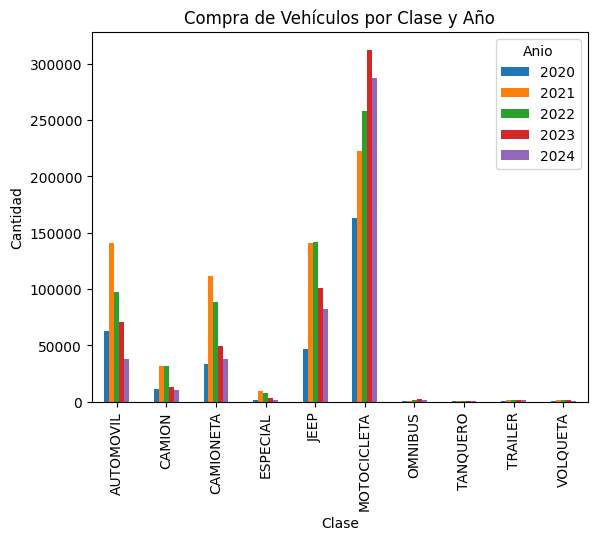

In [9]:
import matplotlib.pyplot as plt

#Cantidad de vehículos vendidos por clase y año

# Crear un dataset solo con ciertas columnas para el análisis
datasetVehiculoClaseAnio = datasetVehiculosTotal.loc[:, ['Marca', 'Modelo', 'Clase', 'Anio']]

# Crear un pivot table con las columnas a analizaar
pivotVehiculoClaseAnio = datasetVehiculoClaseAnio.pivot_table(index='Clase', columns='Anio', values='Marca', aggfunc='count')
#display(pivotVehiculoClaseAnio)

# Dibujar el gráfico para análisis
pivotVehiculoClaseAnio.plot(kind='bar')
plt.title("Compra de Vehículos por Clase y Año")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

##### Conclusión

Del ánalisis realizado se puede concluir que los vehículos más vendidos por año en el periodo de los 5 años de análisis son las motocicletas. Basado en esta conclusión se analizará las motocicletas para analizar cuales marcas se compran más.

#### Top de las 10 marcas más vendidas en las motocicletas



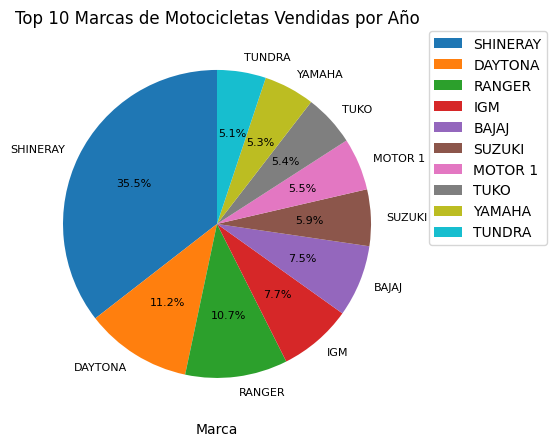

In [10]:
# Crear un dataset solo de las motocicletas
dataSetMotocicletas = datasetVehiculoClaseAnio[datasetVehiculoClaseAnio['Clase'] == 'MOTOCICLETA']

# Crear un pivot table
pivotMotocicletas = dataSetMotocicletas.pivot_table(index='Marca', columns='Anio', values='Modelo', aggfunc='count')

# Ordenar y seleccionar el top 10 de Marcas de Moto
top10Motocicletas = pivotMotocicletas.sum(axis=1).nlargest(10).index
pivotMotocicletasFiltrado = pivotMotocicletas.loc[top10Motocicletas]
#display(pivotMotocicletasFiltrado)

# Sumar las ventas de todos los años para cada marca
pivotMotocicletasFiltrado['Total'] = pivotMotocicletasFiltrado.sum(axis=1)

# Graficar el pivot table filtrado tomando en cuenta el total por año
pivotMotocicletasFiltrado.plot(kind='pie', y="Total", autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8},
                               figsize=(5,5))
plt.title("Top 10 Marcas de Motocicletas Vendidas por Año")
plt.xlabel("Marca")
plt.ylabel("")

# Ubicar la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()


##### Conclusión

Se puede concluir las marcas **Shineray, Daytona y Ranger** ocupa más del 50% del mercado en ventas

#### Top de las 10 marcas más vendidas en Automóviles

Para este análisis se revisará primero las 10 marcas de automóviles más vendidos y basado en estas marcas se realizará un análisis complementario para conocer la evolución de las mismas en el periodo de tiempo de estudio que va del rango de 2020 a 2024

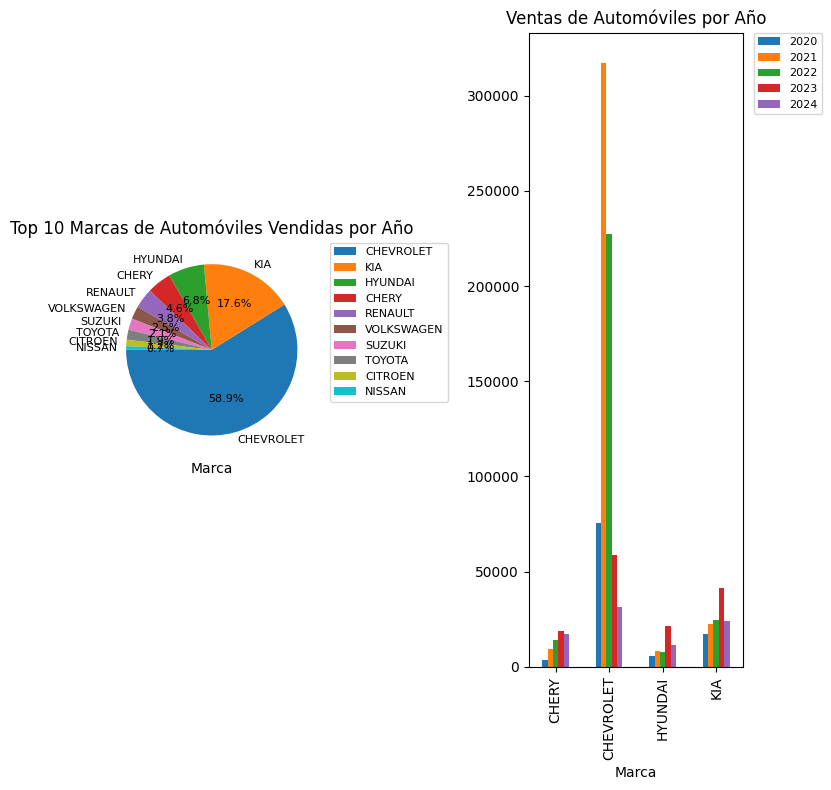

In [11]:
# Crear un dataset solo de las vehículos
datasetAutomoviles = datasetVehiculosTotal[datasetVehiculosTotal['Clase'] == 'AUTOMOVIL']

# Crear un pivot table
pivotAutomoviles = datasetAutomoviles.pivot_table(index='Marca', columns='Anio', values='Modelo', aggfunc='count')

# Obtener las 10 Automóviles más vendidos
top10Automoviles = pivotAutomoviles.sum(axis=1).nlargest(10).index
pivotAutomovilesFiltrado = pivotAutomoviles.loc[top10Automoviles]

# Sumar las ventas de todos los años para cada marca
pivotAutomovilesFiltrado['Total'] = pivotAutomovilesFiltrado.sum(axis=1)

# Graficar el pivot table filtrado tomando en cuenta el total por año
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))

pivotAutomovilesFiltrado.plot(kind='pie', y="Total", autopct='%1.1f%%',
                              startangle=180, textprops={'fontsize': 8},
                              ax=ax1)
ax1.set_title("Top 10 Marcas de Automóviles Vendidas por Año")
ax1.set_xlabel("Marca")
ax1.set_ylabel("")

# Ubicar la leyenda fuera del gráfico
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=8)


# Segundo gráfico con las marcas más vendidas
marcas_deseadas = ['CHEVROLET', 'KIA', 'HYUNDAI', 'CHERY']
datasetAutomovilesMarcas = datasetVehiculosTotal[datasetVehiculosTotal['Marca'].isin(marcas_deseadas)]

pivotAutomoviles = datasetAutomovilesMarcas.pivot_table(index='Marca', columns='Anio', values='Modelo', aggfunc='count')
pivotAutomoviles.plot(kind='bar', ax=ax2)
ax2.set_title("Ventas de Automóviles por Año")
ax2.set_xlabel("Marca")
ax2.set_ylabel("")

ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=8)

plt.tight_layout()

plt.show()


##### Conclusión

Del análisis realizado se puede concluir que en el periodo de análisis del 2020 al 2024 las ventas de vehículos está liderada por la marca **Chevrolet** con más del 50% del mercado, seguidas de las marcas asiáticas como **Kia**, **Hyundai** y **Chery**. Sin embargo, cada vez la diferencia se acorta entre las mismas, lo cual puede evidenciarse en el último año 2024 en donde la marca  Kia está muy cerca en ventas que la marca Chevrolet

#### Total de Ventas Mensuales por año
Se realizo un análisis sobre las ventas mensuales de cada año

In [1]:
import seaborn as sns

# Crear dataset de la venta de vehiculos segmentado por Clase, Marca, AnioCompra, MesCompra y Avaluo
datasetVenta = datasetVehiculosTotal.loc[:,['Clase', 'Marca', 'AnioCompra', 'MesCompra', 'Avaluo']]

# Corregir el tipo de dato de la columna Avaluo para corregir errore de sumarización
datasetVenta['Avaluo'] = pd.to_numeric(datasetVenta['Avaluo'], errors='coerce')

# Corregir el tipo de dato de la columna Anio para ordenar correctamente los meses
datasetVenta['MesCompra'] = pd.to_numeric(datasetVenta['MesCompra'], errors='coerce')

# Crear un pivot que sumarice las ventas por Año y Mes
pivotVentaAnioMes = datasetVenta.pivot_table(index='AnioCompra', columns='MesCompra', values='Avaluo', aggfunc='sum')
#display(pivotVentaAnioMes)

# Dividir los valores para representarlos en K
pivotVentaAnioMes = pivotVentaAnioMes / 1000

sns.heatmap(pivotVentaAnioMes, annot=True, fmt=".0f", cmap="viridis",
            annot_kws={"rotation": 90, "fontsize": 8})

plt.title("Total de Ventas Mensuales por Año en K")
plt.xlabel("Mes")
plt.ylabel("Año")
plt.show()

# Crear una serie sumarizando el valor de avaluo por año
ventasPorAnio = datasetVenta.groupby('AnioCompra')['Avaluo'].sum()
sns.barplot(x=ventasPorAnio.index, y=ventasPorAnio.values)
plt.title("Total de Ventas por Año")
plt.xlabel("Año")
plt.ylabel("Total de Ventas")
plt.show()




NameError: name 'datasetVehiculosTotal' is not defined

##### Conclusión
De análisis realizado se puede concluir que la compra de vehículos a disminuido

In [18]:
!git add .

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
!git commit -m "Actualización tarea" --date="`date +%Y-%m-%d`"

In [ ]:
!git push origin main